In [2]:
import pandas as pd
dataset=pd.read_csv("SBIN_stock_data.csv", parse_dates=['Date'], index_col='Date')

In [3]:
dataset

,Open,High,Low,Close
Date,,,,
2021-07-01,420.299988,423.700012,417.149994,420.399994
2021-07-02,420.299988,425.399994,419.000000,424.399994
2021-07-05,426.500000,434.500000,424.250000,432.649994
2021-07-06,431.700012,436.500000,428.200012,429.750000
2021-07-07,429.350006,434.000000,427.549988,432.850006
...,...,...,...,...
2023-01-19,591.000000,591.750000,587.549988,589.849976
2023-01-20,593.799988,596.599976,590.799988,592.200012
2023-01-23,598.500000,601.750000,592.950012,600.450012


In [4]:
#Start date and end_date
from datetime import date, timedelta
import pandas as pd
start_date = pd.to_datetime("2021-07-01")
end_date = pd.to_datetime("2022-07-28") - timedelta(days=1) #Excluding last

#List of all dates
all_date = pd.date_range(start_date, end_date, freq='d')

In [5]:
all_date

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
               '2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08',
               '2021-07-09', '2021-07-10',
               ...
               '2022-07-18', '2022-07-19', '2022-07-20', '2022-07-21',
               '2022-07-22', '2022-07-23', '2022-07-24', '2022-07-25',
               '2022-07-26', '2022-07-27'],
              dtype='datetime64[ns]', length=392, freq='D')

In [6]:
dummyDate=dataset

In [7]:
dummyDate.index=all_date

In [8]:
dummyDate

,Open,High,Low,Close
2021-07-01,420.299988,423.700012,417.149994,420.399994
2021-07-02,420.299988,425.399994,419.000000,424.399994
2021-07-03,426.500000,434.500000,424.250000,432.649994
2021-07-04,431.700012,436.500000,428.200012,429.750000
2021-07-05,429.350006,434.000000,427.549988,432.850006
...,...,...,...,...
2022-07-23,591.000000,591.750000,587.549988,589.849976
2022-07-24,593.799988,596.599976,590.799988,592.200012
2022-07-25,598.500000,601.750000,592.950012,600.450012
2022-07-26,603.500000,604.599976,593.049988,594.349976


In [9]:
#DateIndex.index=pd.to_datetime(dataset["Date"],infer_datetime_format=True)

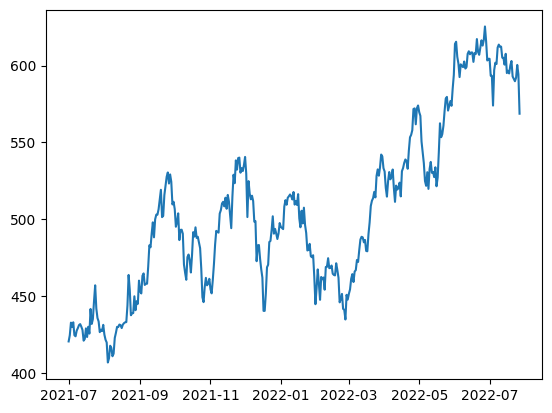

In [10]:
import matplotlib.pyplot as plt
plt.plot(dataset["Close"])

<Figure size 1600x500 with 0 Axes>

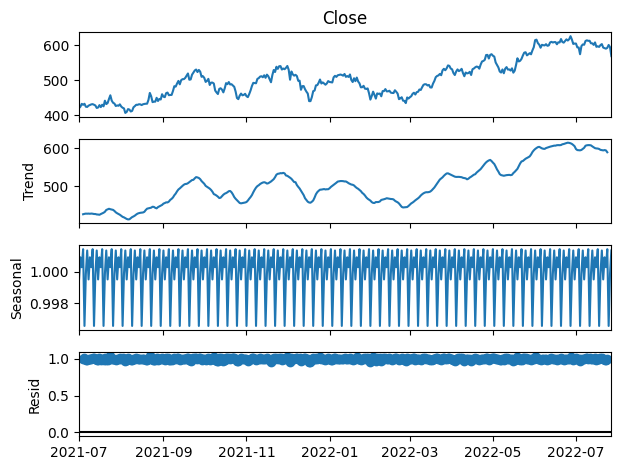

In [11]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dummyDate["Close"], model='multiplicative')
plt.figure(figsize=(16,5))
result.plot()
plt.show()

<Figure size 1600x500 with 0 Axes>

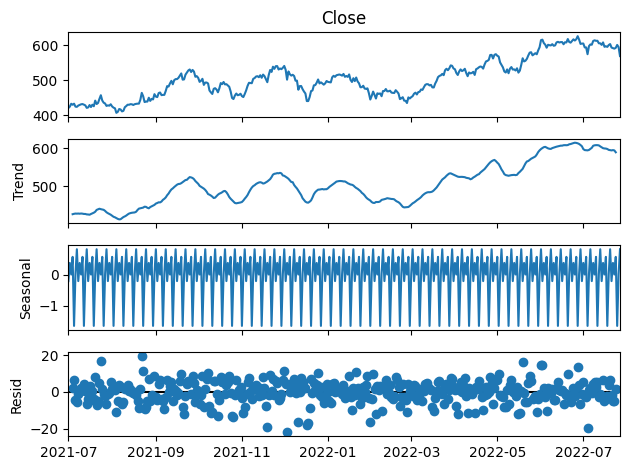

In [12]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dummyDate["Close"], model='additive')
plt.figure(figsize=(16,5))
result.plot()
plt.show()

In [13]:
# ADF Test
# Function to print out results in customised manner
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries,df,pollutant):
    plt.figure(figsize=(16,5))
    # Plot the data
    # ADF Test
    # Function to print out results in customised manner
    from statsmodels.tsa.stattools import adfuller
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    ans=dfoutput
    print("Condition:")
    print("p-value<=0.05-->Accept Alternate Hypothesis")
    print("p-value>0.05-->Accept Null Hypothesis")
    if(ans['Test Statistic']<ans["Critical Value (1%)"] or ans['Test Statistic']<ans["Critical Value (5%)"] or ans['Test Statistic']<ans["Critical Value (10%)"] and ans["p-value"]<0.05):
        print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
        print("Reject null hypothesis:Non Stationarity")
        print("Accept Alternate hypothesis:Staionarity ")
        message="Stationarity based on ADH"
    else:
        print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
        print("Accept null hypothesis:Non Stationarity" )
        print("Reject Alternate hypothesis:Staionarity ")
        message="Non-stationarity based on ADH"
        
    plt.plot(df.index, df[pollutant], label = pollutant)
    plt.legend(loc='best')
    plt.title("{}_{}_2013 to 2021".format(message,pollutant))
    plt.savefig("{}_ADH.png".format(pollutant))
    plt.show()
    
    return message
    
# Call the function and run the test

Results of Dickey-Fuller Test:
Test Statistic                  -1.634514
p-value                          0.465129
#Lags Used                       0.000000
Number of Observations Used    391.000000
Critical Value (1%)             -3.447186
Critical Value (5%)             -2.868960
Critical Value (10%)            -2.570723
dtype: float64
Condition:
p-value<=0.05-->Accept Alternate Hypothesis
p-value>0.05-->Accept Null Hypothesis
Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis
Accept null hypothesis:Non Stationarity
Reject Alternate hypothesis:Staionarity 


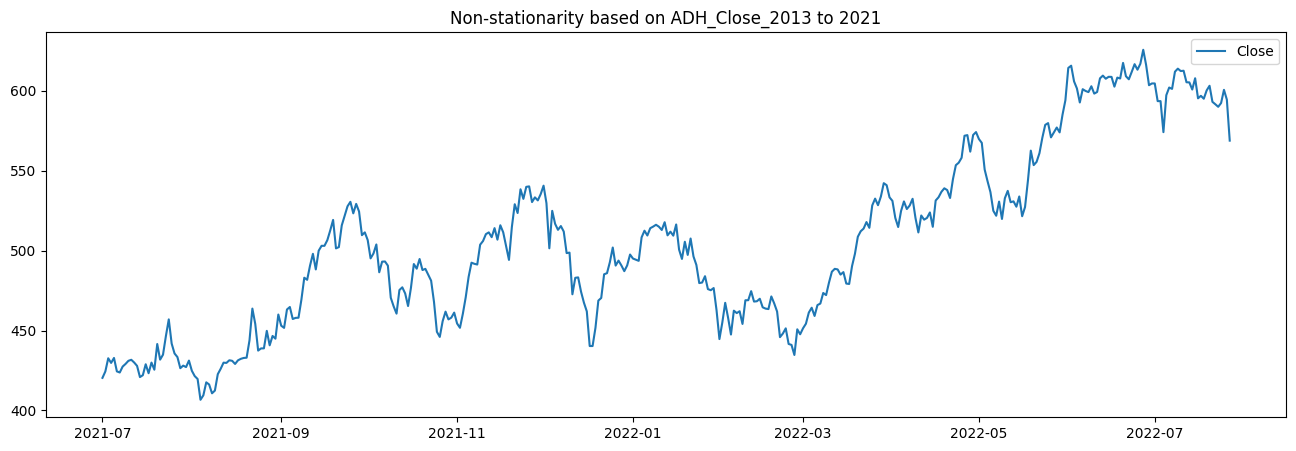

'Non-stationarity based on ADH'

In [14]:
adf_test(dataset["Close"],dataset,"Close")